<a href="https://colab.research.google.com/github/juimdpp/cca-final-project/blob/main/CCA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCA Project: Topic 1

## 1. Load Datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load breast cancer datasets
cancer = datasets.load_breast_cancer()
# cancer

In [3]:
# Load dataset into pandas dataframe
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
print("No. of samples:", len(cancer.data), "\tNo. of features:", len(cancer.feature_names))
# print("Features: ", df.columns)
df.head(5)

No. of samples: 569 	No. of features: 30


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Feature Correlation
Analyze the correlation between features by separating the feature columns and plotting graphs to oberve the relationship between individual features.

In [4]:
# print(df.columns) # Show feature list

# Separate feature columns into mean, error and worst
feature_mean = list(df.columns[0:10])
feature_error = list(df.columns[10:20])
feature_worst = list(df.columns[20:])

### Correlation Plots

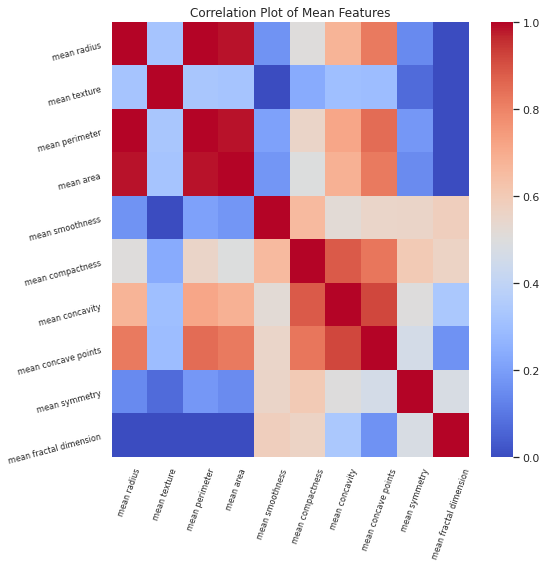

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot feature correlations using heatmap
def corr_heatmap(feature_list, feature_name):
  mean_corr = df[feature_list].corr()
  fig=plt.figure(figsize=(8,8))
  plt.tight_layout()
  g = sns.heatmap(mean_corr, cmap='coolwarm', vmin=0, vmax=1)
  g.set_xticklabels(g.get_xticklabels(), rotation=70, fontsize=8)
  g.set_yticklabels(g.get_yticklabels(), rotation=15, fontsize=8)
  plt.title(f"Correlation Plot of {feature_name} Features")
  plt.savefig(f"Corr_{feature_name}_Features.png", dpi=50)
  plt.show()

# Show heatmaps for feature types
plt_mean = corr_heatmap(feature_mean, 'Mean')
# plt_error = corr_heatmap(feature_error, 'Error')
# plt_worst = corr_heatmap(feature_worst, 'Worst')

# Strong correlation between perimeter, area and radius features

## 2. Split Data into Training Sets

In [6]:
# Global variables
num_train = 20 # length of training set

In [10]:
from sklearn.model_selection import train_test_split

cancer_x = cancer.data
cancer_y = cancer.target

# split data into training and test sets

cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancer_x, cancer_y, test_size = num_train, shuffle=False)
# cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancer_x, cancer_y, test_size=0.25, stratify=cancer_y, random_state=30)

print("Training set: ", cancer_x_train.shape)
print("Test set: ", cancer_x_test.shape)

Training set:  (549, 30)
Test set:  (20, 30)


## 3. PCA Dimension Reduction

In [11]:
# Global variables and parameters
n_components = 4 # num of principal components
variance = 0.95 # min percentage of variance that needs to be explained 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features
cancer_x_std = StandardScaler().fit_transform(cancer_x)
# std_df = pd.DataFrame(cancer_x, columns = cancer.feature_names)
# std_df

In [14]:
# Apply PCA
cancer_pca = PCA(n_components) 
cancer_pca_scaled = cancer_pca.fit_transform(cancer_x_std)
print("Shape of scaled and 'PCA'ed features: ", np.shape(cancer_pca_scaled))

Shape of scaled and 'PCA'ed features:  (569, 4)


In [15]:
# Find variance of principal components
feat_var = np.var(cancer_pca_scaled, axis=0)
feat_var_rat = feat_var/np.sum(feat_var)

print(f"Variance Ratio of {n_components} PCA:\t", feat_var_rat)
print(f"Accumulated Variance Ratio:\t", np.cumsum(feat_var_rat))

Variance Ratio of 4 PCA:	 [0.55871858 0.23941873 0.11854291 0.08331978]
Accumulated Variance Ratio:	 [0.55871858 0.79813731 0.91668022 1.        ]


<class 'list'>


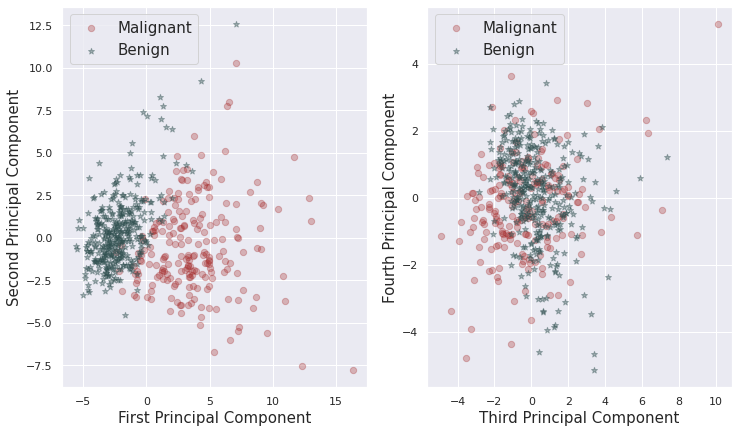

In [16]:
# Plot components to see how separated samples are
#print (type(cancer.target))
cancer_target_list = cancer_y.tolist()
print (type(cancer_target_list))
#print (cancer_target_list)
#print (type(yl))
feature_scaled_pca_X0 = cancer_pca_scaled[:, 0]
feature_scaled_pca_X1 = cancer_pca_scaled[:, 1]
feature_scaled_pca_X2 = cancer_pca_scaled[:, 2]
feature_scaled_pca_X3 = cancer_pca_scaled[:, 3]

labels = cancer_target_list
colordict = {0:'brown', 1:'darkslategray'}
piclabel = {0:'Malignant', 1:'Benign'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_scaled_pca_X0[ix], feature_scaled_pca_X1[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(1,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_scaled_pca_X2[ix1], feature_scaled_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Third Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.savefig('Cancer_labels_PCAs.png', dpi=200)
plt.show()

First and Second principal components play more significant roles in classifying Malignant/Benign samples

## 4. Support Vector Machine (SVM) 

### 4.1 Pipeline & Grid-Search Cross Validation

In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Pipeline steps: Standard Scaler, PCA, SVM
pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SVM', SVC(kernel='rbf'))]

"""
Grid/range of param values to check in hyperparameter tuning
Tuning params
PCA: n_components
SVM: C, gamma 
"""
grid_params={
    'pca__n_components': [2],
    'SVM__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
    'SVM__gamma': [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

pipeline = Pipeline(pipe_steps)


### 4.2 Grid-Search Cross Validation
tqdm outputs a smart progress bar by wrapping around any iterable to show you how much time has elapsed, and the estimated time remaining for the iterable.


In [19]:
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

print("Start Fitting Training Data")
# Perform GridSearchCV using k-fold cross validation where k=3,4,5
for cv in tqdm(range(3, 6)):
  create_grid = GridSearchCV(pipeline, param_grid=grid_params, cv=cv)
  create_grid.fit(cancer_x_train, cancer_y_train)
  print(f"Score for {cv} fold CV := {create_grid.score(cancer_x_test, cancer_y_test)}")
  print("===== Best-fit Parameters From Training Data =====")
  print(create_grid.best_params_)

print("Done!")
print(f"\nBest params: {create_grid.best_params_}")

Start Fitting Training Data


Score for 3 fold CV := 1.0
===== Best-fit Parameters From Training Data =====
{'SVM__C': 40, 'SVM__gamma': 0.05, 'pca__n_components': 2}
Score for 4 fold CV := 1.0
===== Best-fit Parameters From Training Data =====
{'SVM__C': 100, 'SVM__gamma': 0.005, 'pca__n_components': 2}
Score for 5 fold CV := 1.0
===== Best-fit Parameters From Training Data =====
{'SVM__C': 75, 'SVM__gamma': 0.005, 'pca__n_components': 2}

Done!

Best params: {'SVM__C': 75, 'SVM__gamma': 0.005, 'pca__n_components': 2}


## 5. SVM Hyperparameter Tuning

In [ ]:
# TODO

## 6. One-class SVM

In [ ]:
# TODO